In [1]:
import numpy as np
import torch
import matplotlib.pylab as pl
import ot
import ot.plot
from tqdm import trange

In [2]:
import os
import sys
sys.path.append('../code/')
from SWGG import SWGG_GG,SWGG_CP,get_SWGG_smooth
from utils import random_slice,sort_to_plan
from generate_data import make_data

In [3]:
if torch.cuda.is_available():
    device='cuda'
    dtype = torch.cuda.DoubleTensor
else:
    device='cpu'
    dtype=torch.DoubleTensor
print(device)

device='cpu'
dtype=torch.DoubleTensor
torch.set_default_tensor_type(dtype)

cuda


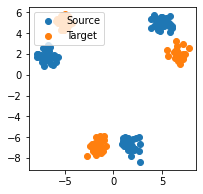

In [61]:
n=90
d=2
X,Y=make_data('mog_reg',n,d)
pl.figure(figsize=(3,3))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source')
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target')
pl.legend(loc=2)

In [62]:
n_proj=10000
theta=random_slice(n_proj,d).T.float()

idx=torch.argmin(SWGG_CP(X,Y,theta)[0])
_,u,v=SWGG_CP(X,Y,theta[:,idx])
P=sort_to_plan(u,v)
PW=ot.emd([],[],ot.dist(X,Y).numpy())

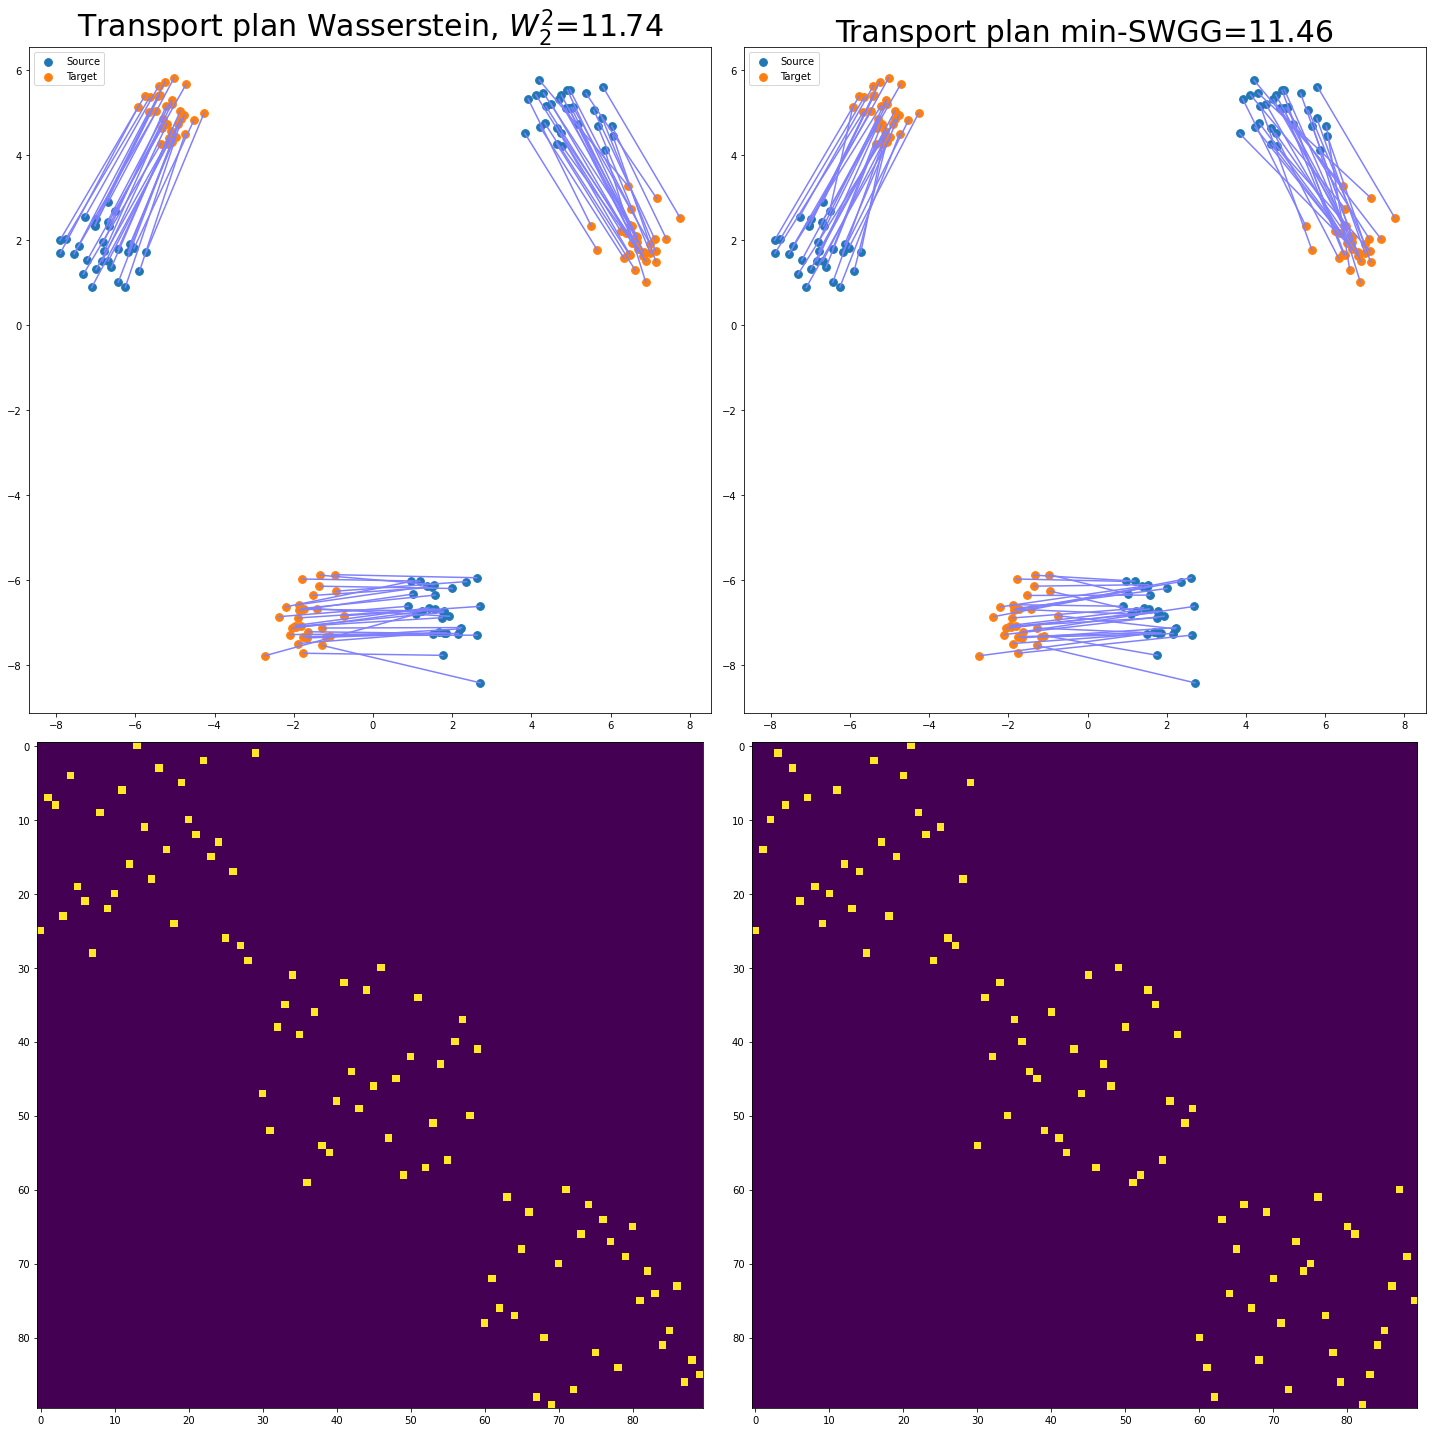

In [63]:
s=60
pl.figure(figsize=(20,20))

pl.subplot(2,2,2)
ot.plot.plot2D_samples_mat(X,Y,P.numpy(), c=[.5, .5, 1])
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=s)
pl.title("Transport plan min-SWGG=11.46",size=30)
pl.legend(loc=2)

pl.subplot(2,2,1)
ot.plot.plot2D_samples_mat(X,Y,PW, c=[.5, .5, 1])
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=s)
pl.title("Transport plan Wasserstein, $W_2^2$=11.74",size=30)
pl.legend(loc=2)

pl.subplot(2,2,4)
pl.imshow(P, interpolation='nearest')

pl.subplot(2,2,3)
pl.imshow(PW, interpolation='nearest')

pl.tight_layout()

pl.savefig("Transport_plan1.pdf",bbox_inches='tight')

In [64]:
C=ot.dist(X,Y)
print(sum(sum(P*C)))
print(sum(sum(PW*C.numpy())))

tensor(12.6948)
12.431074045598507


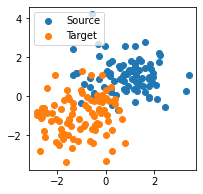

In [85]:
n=90
d=2
X,Y=make_data('gaussians',n,d)
pl.figure(figsize=(3,3))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source')
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target')
pl.legend(loc=2)

In [86]:
n_proj=10000
theta=random_slice(n_proj,d).T.float()

idx=torch.argmin(SWGG_CP(X,Y,theta)[0])
_,u,v=SWGG_CP(X,Y,theta[:,idx])
P=sort_to_plan(u,v)
PW=ot.emd([],[],ot.dist(X,Y).numpy())

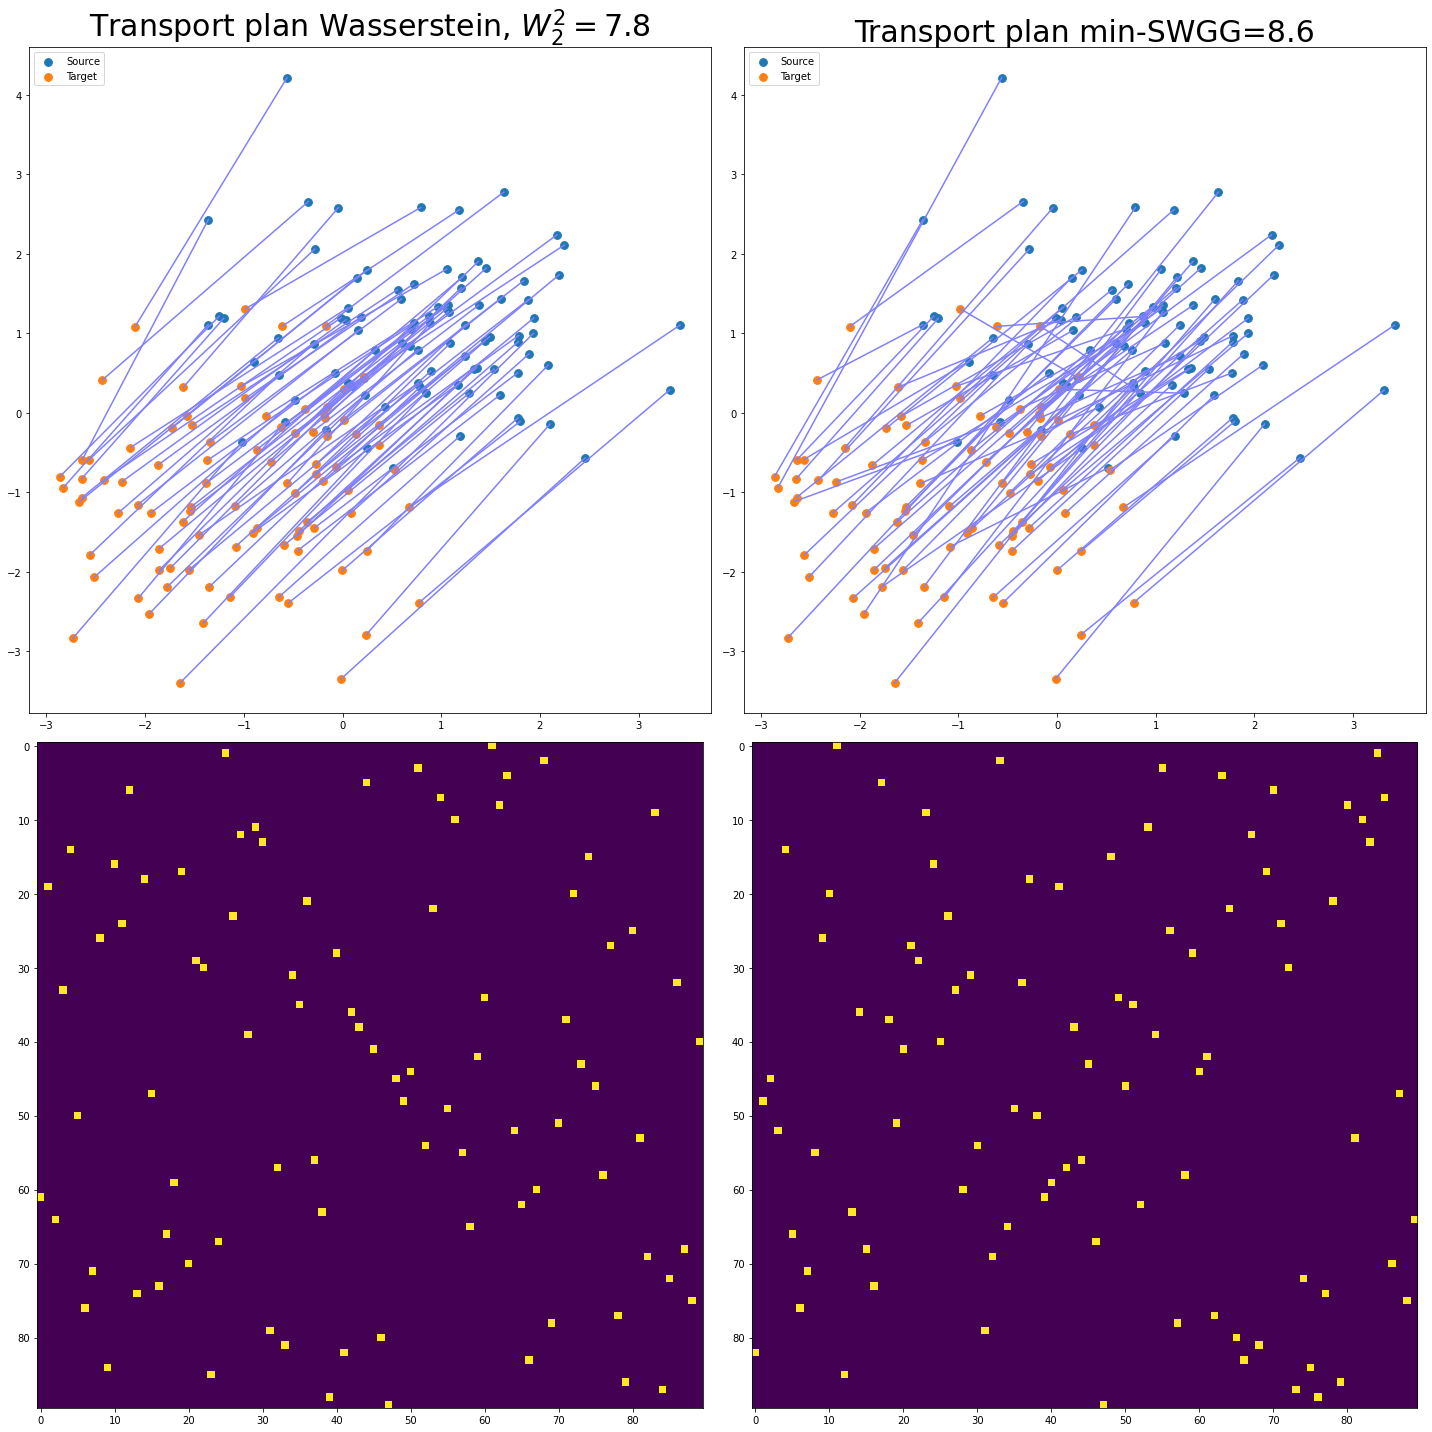

In [90]:
s=60
pl.figure(figsize=(20,20))
pl.subplot(2,2,2)
ot.plot.plot2D_samples_mat(X,Y,P.numpy(), c=[.5, .5, 1])
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=s)
pl.title("Transport plan min-SWGG=8.6",size=30)
pl.legend(loc=2)

pl.subplot(2,2,1)
ot.plot.plot2D_samples_mat(X,Y,PW, c=[.5, .5, 1])
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=s)
pl.title("Transport plan Wasserstein, $W_2^2=7.8$",size=30)
pl.legend(loc=2)

pl.subplot(2,2,4)
pl.imshow(P, interpolation='nearest')

pl.subplot(2,2,3)
pl.imshow(PW, interpolation='nearest')

pl.tight_layout()

pl.savefig("Transport_plan2.pdf",bbox_inches='tight')

In [88]:
C=ot.dist(X,Y)
print(sum(sum(P*C)))
print(sum(sum(PW*C.numpy())))

tensor(8.6860)
7.753353871405125
